In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1

* $\alpha$ représente (la procréation - les morts naturels) de l'espèce proie
* $\beta$ caractérise la quantité de proie consommés par les prédateurs, par prédateurs par unité de temps
* $\gamma$ représente (la procréation - les morts naturels) de l'espèce prédateur
* $\delta$ caractérise les morts 

Soit $x_0 = (x_{10}, x_{20})$ un point d'équilibre du système. On a $\begin{cases} \dot{x}_1|_{x_{10}} = 0 \\ \dot{x}_2|_{x_{20}} = 0 \end{cases}$ alors $x_0$ vérifie 
$$
\begin{cases} x_{10}(\alpha - \beta x_{20})=0 \\ -x_{20}(\gamma - \delta x_{10}) = 0 \end{cases}
\iff 
\begin{cases} x_{10} = 0 & \mbox{ou } &\alpha - \beta x_{20}=0 \\ x_{20} = 0 & \mbox{ou } &\gamma - \delta x_{10} = 0 \end{cases}
$$
En considérant les quatre possibilités, les seules compatibles avec la stricte posivité des constantes $\alpha,\beta,\gamma,\delta$ sont $x_0=(0,0)$ et $\bar{x} = (\frac{\gamma}{\delta}, \frac{\alpha}{\beta})$ qui appartient donc à $\mathbb{R}_{>0} \times \mathbb{R}_{>0}$

Soit $\varepsilon = (\varepsilon_1, \varepsilon_2)$ une petite variation depuis une position d'équilibre.
* Les deux sont instables?

In [49]:
def f(Position):    
    x1, x2 = Position
    u = x1 * (alpha - beta * x2)
    v = - x2 * (gamma - delta * x1)
    return np.array([u,v])

### Question 2

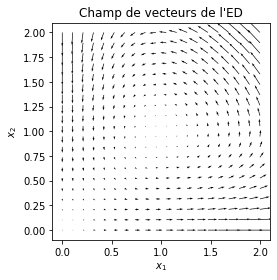

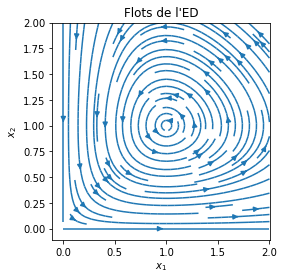

In [84]:
alpha, beta = 1, 1
gamma, delta = 1, 1

N = 20
X = np.linspace(0, 2, N)
Y = np.linspace(0, 2, N)
Grille = np.array(np.meshgrid(X, Y))
Dirs = f(Grille)
Pos = np.array(Grille.reshape(2, -1))

plt.quiver(*Pos, *Dirs)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Champ de vecteurs de l'ED")
plt.axis('square')
plt.show()

plt.streamplot(X, Y, *Dirs, density = 1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Flots de l'ED")
plt.axis('square')
plt.show()

### Question 3

### Question 6

In [91]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = [t0]
    x = [x0]
    while t[-1] + dt < tf:
        x0 = x[-1]
        x1 = x0 + dt * f(t[-1], x0)
        x.append(x1)
        t1 = t[-1] + dt
        t.append(t1)
    return np.array(t), np.array(x)


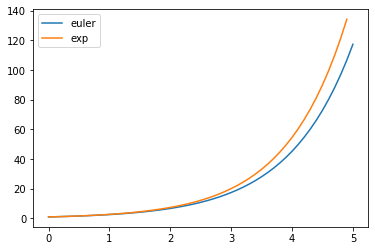

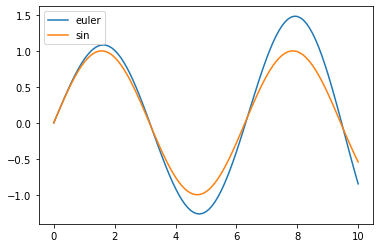

In [103]:
def f1(t, x):                           # Equation de l'exponentielle
    return x

def f2(t, x):                           # Vectorisation de l'oscillateur harmonique
    return np.array([-x[1], x[0]])

dt = 0.1
plt.plot(*solve_euler_explicit(f1, 1, dt, 0, 5), label = 'euler')
t = np.arange(0,5,0.1)
plt.plot(t, np.exp(t), label='exp')
plt.legend()
plt.show()

dt = 0.1
t, x = solve_euler_explicit(f2, [1, 0], dt, 0, 10)
plt.plot(t, x[:,1], label = 'euler')
plt.plot(t, np.sin(t), label='sin')
plt.legend()
plt.show()